In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [4]:
dataset=pd.read_csv('Linear Regression1.csv')

In [5]:
dataset

,S.NO,YOUTUBE,FACEBOOK,NEWSPAPER,SALES
0,1,276.12,45.36,83.04,2652
1,2,53.40,47.16,54.12,1248
2,3,20.64,55.08,83.16,1116
3,4,181.80,49.56,70.20,2220
4,5,216.96,12.96,70.08,1548
5,6,10.44,58.68,90.00,8640
6,7,69.00,39.36,28.20,1416
7,8,144.24,23.52,13.92,1584
8,9,10.32,2.52,1.20,5760
9,10,239.76,3.12,25.44,1272


# Simple linear regression

In [6]:
x=dataset['SALES'].values.reshape(-1,1)
y=dataset['FACEBOOK'].values.reshape(-1,1)

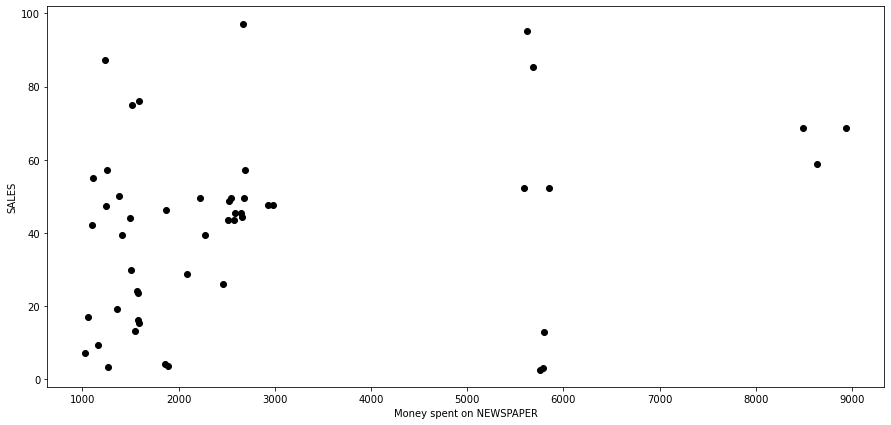

In [7]:
plt.figure(figsize=(15,7))
plt.scatter(x,y,c='black')
plt.xlabel("Money spent on NEWSPAPER")
plt.ylabel("SALES")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

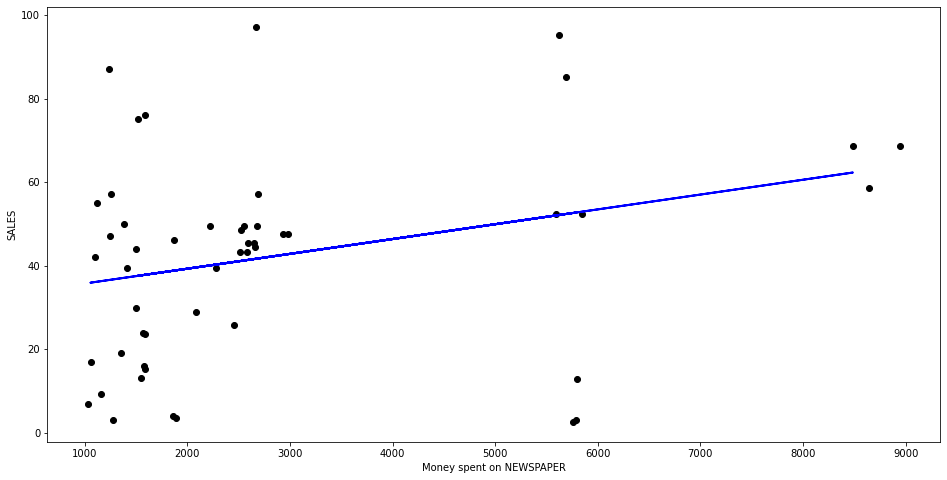

In [10]:
y_pred = reg.predict(x_test)
plt.figure(figsize=(16,8))
plt.scatter(x,y, c='black')
plt.plot(
    x_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on NEWSPAPER")
plt.ylabel("SALES")
plt.show()

In [11]:
reg.coef_

array([[0.00355237]])

In [12]:
reg.intercept_

array([32.15338374])

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.032024907118453516

In [14]:
output=reg.predict([[276.12]])
output

array([[33.13426323]])

# Multiple linear regression

In [15]:
x=dataset.drop(['SALES'],axis=1)
y=dataset['SALES'].values.reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
multiple_reg=LinearRegression()
multiple_reg.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = multiple_reg.predict(x_test)

In [20]:
multiple_reg.intercept_

array([2323.58816012])

In [21]:
multiple_reg.coef_

array([[-12.94317672,  -3.18469403,  16.90524773,   7.7689118 ]])

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.008650323280840588

In [ ]:
print("Enter the amount:")
youtube= float(input("YOUTUBE : "))
facebook = float(input("FACEBOOK : "))
newspaper = float(input("NEWSPAPER : "))
output=multiple_reg.predict([[youtube,facebook,newspaper]])
print("Amount you get Rs{:.2f} sales by Rs{} on YOUTUBE, Rs{} on FACEBOOK and Rs{} on NEWSPAPER."\
      .format(output[0][0] if output else "not found",youtube,facebook,newspaper))

Enter the amount:
YOUTUBE : 123
FACEBOOK : 235
